In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input
from tensorflow.keras.models import Model

In [62]:
data = pd.read_csv("AAPL.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-04,174.570007,178.490005,174.440002,178.440002,177.365570,76468400
1,2022-04-05,177.500000,178.300003,174.419998,175.059998,174.005920,73401800
2,2022-04-06,172.360001,173.630005,170.130005,171.830002,170.795380,89058800
3,2022-04-07,171.160004,173.360001,169.850006,172.139999,171.103500,77594700
4,2022-04-08,171.779999,171.779999,169.199997,170.089996,169.065842,76575500


In [63]:
data.shape

(250, 7)

In [64]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Open','High','Low','Close']].values)

In [65]:
scaled_data.shape

(250, 4)

In [66]:
# Split the data into training and test sets

train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size, :]
test_data = scaled_data[train_size:, :]

In [67]:
train_data.shape , test_data.shape

((200, 4), (50, 4))

In [68]:
# Define the input and output sequences
# def create_dataset(dataset, time_step=1, future_steps=1):
#     X, y = [], []
#     for i in range(len(dataset)-time_step-future_steps+1):
#         X.append(dataset[i:(i+time_step), :])
#         y.append(dataset[i + time_step:i + time_step + future_steps, 0])
#     return np.array(X), np.array(y)

def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step), :])
        y.append(dataset[i + time_step, :])
    return np.array(X), np.array(y)

In [69]:
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [70]:
features = train_data.shape[1]

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], features)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], features)

In [71]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((169, 30, 4), (169, 4), (19, 30, 4), (19, 4))

In [72]:
X_train[0]

array([[0.94309588, 1.        , 1.        , 1.        ],
       [1.        , 0.9962539 , 0.99960207, 0.93672775],
       [0.90017481, 0.90417983, 0.91426305, 0.87626358],
       [0.87686937, 0.8988564 , 0.90869314, 0.8820666 ],
       [0.88891044, 0.86770495, 0.89576279, 0.8436914 ],
       [0.82928737, 0.81348572, 0.82216031, 0.76244851],
       [0.81588665, 0.83004715, 0.84483783, 0.79820298],
       [0.80365117, 0.85311493, 0.84742396, 0.84949444],
       [0.86638172, 0.85764985, 0.81300958, 0.75383737],
       [0.73625942, 0.76557577, 0.78376777, 0.74971932],
       [0.75762291, 0.78962941, 0.79053119, 0.7933357 ],
       [0.8302582 , 0.81052842, 0.83409598, 0.79015341],
       [0.83317156, 0.86277593, 0.83031635, 0.77499059],
       [0.78558956, 0.79061498, 0.74258999, 0.68831884],
       [0.68187987, 0.69794944, 0.6821167 , 0.70872341],
       [0.70382597, 0.68158505, 0.64750349, 0.59490833],
       [0.58069534, 0.63130897, 0.62084751, 0.5906029 ],
       [0.64556223, 0.72456627,

In [73]:
# Define the model architecture

# ===========================================================

inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
x = LSTM(50, return_sequences=True)(inputs)
x = Dropout(0.2)(x)
x = LSTM(50, return_sequences=True)(x)
x = Dropout(0.2)(x)
x = LSTM(50)(x)
x = Dropout(0.2)(x)
outputs = Dense(1)(x)
model = Model(inputs=inputs, outputs=outputs)


# ============================================================
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import SimpleRNN
# model = Sequential()
# model.add(SimpleRNN(units = 200 , return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2])))
# model.add(Dropout(0.2))
# model.add(SimpleRNN(units=150))
# model.add(Dropout(0.2))
# model.add(Dense(units=1, activation = 'linear'))

In [74]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [75]:
# Train the model with early stopping
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
6/6 [==============================] - 6s 51ms/step - loss: 0.0787
Epoch 2/100
6/6 [==============================] - 0s 51ms/step - loss: 0.0340
Epoch 3/100
6/6 [==============================] - 0s 48ms/step - loss: 0.0306
Epoch 4/100
6/6 [==============================] - 0s 79ms/step - loss: 0.0260
Epoch 5/100
6/6 [==============================] - 0s 81ms/step - loss: 0.0239
Epoch 6/100
6/6 [==============================] - 0s 82ms/step - loss: 0.0229
Epoch 7/100
6/6 [==============================] - 0s 82ms/step - loss: 0.0205
Epoch 8/100
6/6 [==============================] - 0s 83ms/step - loss: 0.0189
Epoch 9/100
6/6 [==============================] - 1s 83ms/step - loss: 0.0192
Epoch 10/100
6/6 [==============================] - 0s 55ms/step - loss: 0.0174
Epoch 11/100
6/6 [==============================] - 0s 50ms/step - loss: 0.0167
Epoch 12/100
6/6 [==============================] - 0s 49ms/step - loss: 0.0164
Epoch 13/100
6/6 [==============================]

In [76]:
# # Make predictions

predictions = model.predict(X_test)
predictions

1/1 [==============================] - 1s 1s/step


array([[0.4263148 ],
       [0.46930373],
       [0.5080898 ],
       [0.53108954],
       [0.532841  ],
       [0.50800675],
       [0.4826498 ],
       [0.47460502],
       [0.47893104],
       [0.5017248 ],
       [0.5329976 ],
       [0.56486803],
       [0.59938353],
       [0.6291628 ],
       [0.6472216 ],
       [0.65460604],
       [0.6511376 ],
       [0.63423014],
       [0.63398814]], dtype=float32)

In [77]:
predictions.shape

(19, 1)

In [78]:
y_test.shape

(19, 4)

In [79]:
extend_pred = np.repeat(np.expand_dims(predictions[:, -1], axis=-1), features, axis=1)
print(extend_pred[0])
print(extend_pred.shape)

[0.4263148 0.4263148 0.4263148 0.4263148]
(19, 4)


In [80]:
extend_pred = scaler.inverse_transform(extend_pred)
extend_pred

array([[147.96095, 149.39268, 145.60085, 147.79375],
       [150.17445, 151.57309, 147.7619 , 150.0902 ],
       [152.17154, 153.54031, 149.71169, 152.16216],
       [153.35579, 154.70686, 150.86787, 153.39081],
       [153.44598, 154.7957 , 150.95592, 153.48438],
       [152.16727, 153.5361 , 149.70749, 152.15771],
       [150.86163, 152.25   , 148.43282, 150.80316],
       [150.44742, 151.84196, 148.0284 , 150.3734 ],
       [150.67017, 152.06139, 148.24586, 150.60449],
       [151.84381, 153.21748, 149.39171, 151.82214],
       [153.45404, 154.80363, 150.96379, 153.49274],
       [155.09506, 156.4201 , 152.56592, 155.19525],
       [156.87225, 158.17073, 154.30101, 157.03906],
       [158.4056 , 159.68114, 155.79802, 158.62988],
       [159.33545, 160.59709, 156.70584, 159.59457],
       [159.71567, 160.97162, 157.07704, 159.98904],
       [159.53706, 160.7957 , 156.9027 , 159.80377],
       [158.6665 , 159.93816, 156.05275, 158.90057],
       [158.65404, 159.92587, 156.04059, 158.8

In [81]:
arr = []
den = extend_pred.shape[1]
for i in range(len(extend_pred)):
  add = 0
  for j in range(den):
    add += extend_pred[i][j]
  arr.append(add/den)

arr

[147.6870574951172,
 149.89990997314453,
 151.89642333984375,
 153.0803337097168,
 153.17049407958984,
 151.89214324951172,
 150.5869026184082,
 150.17279434204102,
 150.39547729492188,
 151.56878662109375,
 153.17855072021484,
 154.81908416748047,
 156.59576416015625,
 158.12865829467773,
 159.0582389831543,
 159.4383430480957,
 159.25980758666992,
 158.38949584960938,
 158.37703704833984]

In [82]:
extend_pred = arr
extend_pred

[147.6870574951172,
 149.89990997314453,
 151.89642333984375,
 153.0803337097168,
 153.17049407958984,
 151.89214324951172,
 150.5869026184082,
 150.17279434204102,
 150.39547729492188,
 151.56878662109375,
 153.17855072021484,
 154.81908416748047,
 156.59576416015625,
 158.12865829467773,
 159.0582389831543,
 159.4383430480957,
 159.25980758666992,
 158.38949584960938,
 158.37703704833984]

In [83]:
y_test_Final = scaler.inverse_transform(y_test)
y_test_Final = y_test_Final[:,0]
y_test_Final

array([153.789993, 153.699997, 152.809998, 153.559998, 150.210007,
       147.809998, 151.279999, 151.190002, 152.160004, 156.080002,
       155.070007, 157.320007, 159.300003, 158.830002, 158.860001,
       159.940002, 157.970001, 159.369995, 161.529999])

In [84]:
# Evaluate the model
rmse = np.sqrt(np.mean((extend_pred - y_test_Final) ** 2))
print("RMSE: ", rmse)

RMSE:  2.652242419870291


In [85]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_Final, extend_pred)
print(r2)

0.5029629303264533


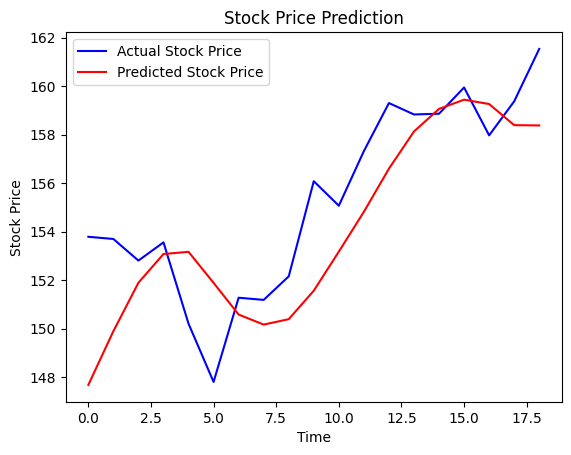

In [86]:
# Plot the results
import matplotlib.pyplot as plt
plt.plot(y_test_Final, color='blue', label='Actual Stock Price')
plt.plot(extend_pred, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
print(scaler.scale_)
scaler_mean = np.mean(scaler.scale_)
print("Mean of all the Scaling Units are : ", scaler_mean)

[0.01871958 0.01942125 0.01971609 0.01989258]
Mean of all the Scaling Units are :  0.019437372557688876


In [ ]:
scaling_factor = 1/ scaler_mean
print(scaling_factor)

51.44728265263549


In [ ]:
for pred in range(len(predictions)):
  predictions[pred] = predictions[pred] * scaling_factor

In [ ]:
predictions

array([[65105004.],
       [84572520.],
       [77803832.],
       [68754816.],
       [70906880.],
       [68677672.],
       [63795900.],
       [76836280.],
       [77016024.],
       [82884424.],
       [81008224.],
       [91732128.],
       [88144080.],
       [89872672.],
       [92918216.],
       [93425496.],
       [94961928.],
       [89256344.],
       [98768168.],
       [98978392.]], dtype=float32)

In [ ]:
y_test = y_test*scaling_factor

In [ ]:
y_test

array([[0.53931116, 0.53952208],
       [0.49756658, 0.53777425],
       [0.52134024, 0.52048936],
       [0.47865961, 0.53505529],
       [0.43953577, 0.46999429],
       [0.47641336, 0.42338312],
       [0.51609877, 0.49077487],
       [0.52358677, 0.48902701],
       [0.57712479, 0.50786566],
       [0.56121303, 0.58399692],
       [0.60613991, 0.56438155],
       [0.64133281, 0.60807936],
       [0.61418948, 0.64653335],
       [0.63478085, 0.63740535],
       [0.65949082, 0.63798796],
       [0.62261323, 0.65896293],
       [0.6108198 , 0.62070305],
       [0.66922508, 0.64789268],
       [0.69898915, 0.68984266],
       [0.74653675, 0.70751605]])

In [ ]:
# Evaluate the model
rmse = np.sqrt(np.mean(((predictions - (y_test)) ** 2)))
print("RMSE: ", rmse)

RMSE:  3.0290509535170154


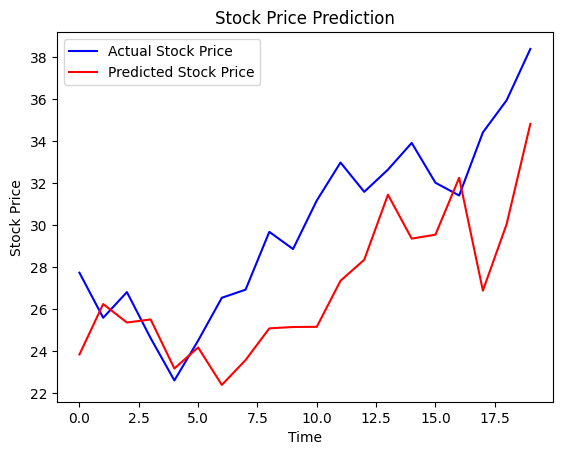

In [ ]:
# Plot the results
import matplotlib.pyplot as plt
plt.plot(y_test, color='blue', label='Actual Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()